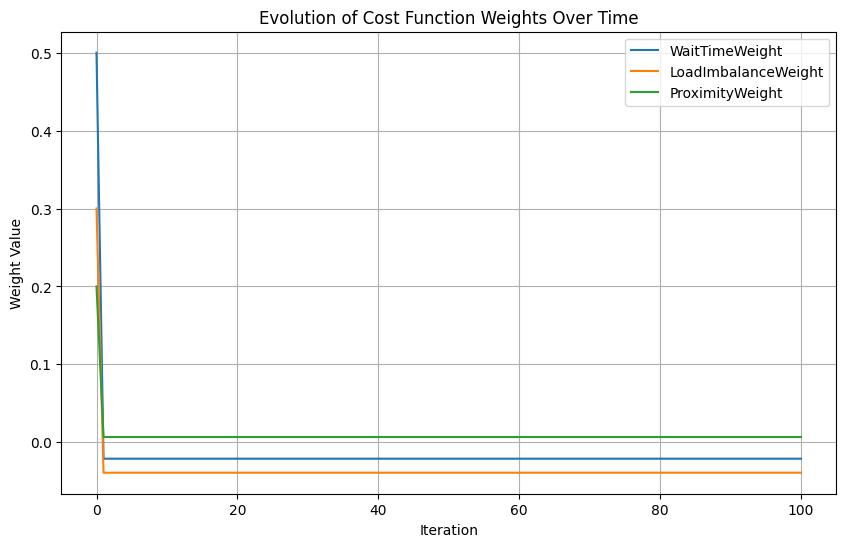


--- Final Updated Weights ---
Wait Time Weight: -0.021128782195657544
Load Imbalance Weight: -0.03913437799234548
Proximity Weight: 0.006666662452176371


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

# Simulate real-time performance data
np.random.seed(42)  # For reproducibility
performance_data = pd.DataFrame({
    "WaitTimeError": np.random.normal(0, 5, 100),  # Error in wait time prediction
    "LoadImbalanceError": np.random.normal(0, 3, 100),  # Error in load balancing
    "ProximityError": np.random.normal(0, 2, 100)  # Error in geographic proximity estimation
})

# Initial cost function weights (e.g., wait time, load imbalance, proximity)
initial_weights = np.array([0.5, 0.3, 0.2])

# Online learning model for weight refinement
# Using SGDRegressor with a constant learning rate
model = SGDRegressor(learning_rate="constant", eta0=0.01, max_iter=1, tol=None, random_state=42)

# Initialize weights for tracking
weights_history = [initial_weights]

# Perform online updates for each performance data point
for i, row in enumerate(performance_data.itertuples(index=False), start=1):
    error_vector = row._asdict().values()  # Extract error components as an array
    error_vector = np.array(list(error_vector)).reshape(1, -1)  # Reshape to 2D for model input

    # Online update with placeholder target (1 for unit correction)
    model.partial_fit(error_vector, [1])  # Target is a placeholder
    updated_weights = model.coef_
    weights_history.append(updated_weights)

# Convert weights history to a DataFrame for analysis
weights_history_df = pd.DataFrame(weights_history, columns=["WaitTimeWeight", "LoadImbalanceWeight", "ProximityWeight"])

# Plot weight evolution over time
plt.figure(figsize=(10, 6))
for column in weights_history_df.columns:
    plt.plot(weights_history_df.index, weights_history_df[column], label=column)
plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.title("Evolution of Cost Function Weights Over Time")
plt.legend()
plt.grid()
plt.show()

# Output final weights
print("\n--- Final Updated Weights ---")
print("Wait Time Weight:", updated_weights[0])
print("Load Imbalance Weight:", updated_weights[1])
print("Proximity Weight:", updated_weights[2])
